In [154]:
import kagglehub

path = kagglehub.dataset_download("rajugc/imdb-movies-dataset-based-on-genre")

print("Path to dataset files:", path)

Resuming download from 10485760 bytes (45478564 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/rajugc/imdb-movies-dataset-based-on-genre?dataset_version_number=3 (10485760/55964324) bytes left.


100%|██████████| 53.4M/53.4M [00:53<00:00, 842kB/s] 

Extracting files...


Path to dataset files: C:\Users\abhay\.cache\kagglehub\datasets\rajugc\imdb-movies-dataset-based-on-genre\versions\3


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import re
import time
import json
import nltk
from collections import Counter
from nltk.corpus import stopwords
from IPython.display import display
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

sns.set()

In [ ]:
genre1 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\action.csv')
genre2 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\crime.csv')
genre3 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\adventure.csv')
genre4 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\thriller.csv')
genre5 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\family.csv')
genre6 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\mystery.csv')
genre7 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\scifi.csv')
genre8 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\history.csv')
genre9 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\sports.csv')
genre10 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\animation.csv')
genre11 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\war.csv')
genre12 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\biography.csv')
genre13 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\horror.csv')
genre14 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\fantasy.csv')
genre15 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\romance.csv')
genre16 = pd.read_csv(r'C:\Users\abhay\Movie_classification\3\film-noir.csv')

In [157]:
df = pd.concat([genre1, genre2, genre3, genre4,
                genre5, genre6, genre7, genre8,
                genre9, genre10, genre11, genre12,
                genre13, genre14, genre15, genre16])

df = df.reset_index(drop=True)

df

,movie_id,movie_name,year,certificate,runtime,genre,rating,description,director,director_id,star,star_id,votes,gross(in $)
0,tt9114286,Black Panther: Wakanda Forever,2022,PG-13,161 min,"Action, Adventure, Drama",6.9,The people of Wakanda fight to protect their h...,Ryan Coogler,/name/nm3363032/,"Letitia Wright, \nLupita Nyong'o, \nDanai Guri...","/name/nm4004793/,/name/nm2143282/,/name/nm1775...",204835.0,NaN
1,tt1630029,Avatar: The Way of Water,2022,PG-13,192 min,"Action, Adventure, Fantasy",7.8,Jake Sully lives with his newfound family form...,James Cameron,/name/nm0000116/,"Sam Worthington, \nZoe Saldana, \nSigourney We...","/name/nm0941777/,/name/nm0757855/,/name/nm0000...",295119.0,NaN
2,tt5884796,Plane,2023,R,107 min,"Action, Thriller",6.5,A pilot finds himself caught in a war zone aft...,Jean-François Richet,/name/nm0724938/,"Gerard Butler, \nMike Colter, \nTony Goldwyn, ...","/name/nm0124930/,/name/nm1591496/,/name/nm0001...",26220.0,NaN
3,tt6710474,Everything Everywhere All at Once,2022,R,139 min,"Action, Adventure, Comedy",8.0,A middle-aged Chinese immigrant is swept up in...,"Dan Kwan, \nDaniel Scheinert",/name/nm3453283/,"Michelle Yeoh, \nStephanie Hsu, \nJamie Lee Cu...","/name/nm3215397/,/name/nm0000706/,/name/nm3513...",327858.0,NaN
4,tt5433140,Fast X,2023,NaN,NaN,"Action, Crime, Mystery",NaN,Dom Toretto and his family are targeted by the...,Louis Leterrier,/name/nm0504642/,"Vin Diesel, \nJordana Brewster, \nTyrese Gibso...","/name/nm0004874/,/name/nm0108287/,/name/nm0879...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368295,tt0032257,Black Diamonds,1940,NaN,60 min,"Crime, Drama, Film-Noir",5.5,A reporter on a visit to his hometown hears of...,Christy Cabanne,/name/nm0127511/,"Richard Arlen, \nAndy Devine, \nKathryn Adams,...","/name/nm0035159/,/name/nm0222596/,/name/nm0011...",33.0,NaN
368296,tt0027668,The Gentleman from Louisiana,1936,NaN,67 min,"Crime, Drama, Film-Noir",4.5,"In Victorian-era USA, a horse-jockey becomes a...",Irving Pichel,/name/nm0681635/,"Eddie Quillan, \nCharles 'Chic' Sale, \nCharlo...","/name/nm0703600/,/name/nm0757925/,/name/nm0377...",21.0,NaN
368297,tt0047929,El cerco,1955,NaN,77 min,"Crime, Film-Noir",6.2,A group of robbers assault a factory in the po...,Miguel Iglesias,/name/nm0407071/,"José Guardiola, \nIsabel de Castro, \nÁngel Jo...","/name/nm0345348/,/name/nm0207894/,/name/nm0430...",46.0,NaN
368298,tt0033161,Three Silent Men,1940,NaN,72 min,"Crime, Drama, Film-Noir",5.0,Foreign scientist is selling a secret weapon t...,Thomas Bentley,/name/nm0072872/,"Sebastian Shaw, \nDerrick De Marney, \nPatrici...","/name/nm0789970/,/name/nm0210116/,/name/nm0733...",79.0,NaN


In [158]:
print('Shape of data: ', df.shape)

Shape of data:  (368300, 14)


In [159]:
df.loc[0, 'movie_name'], df.loc[0, 'description']

('Black Panther: Wakanda Forever',
 "The people of Wakanda fight to protect their home from intervening world powers as they mourn the death of King T'Challa.")

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368300 entries, 0 to 368299
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   movie_id     368300 non-null  object 
 1   movie_name   368296 non-null  object 
 2   year         315052 non-null  object 
 3   certificate  104191 non-null  object 
 4   runtime      259146 non-null  object 
 5   genre        368300 non-null  object 
 6   rating       230938 non-null  float64
 7   description  368300 non-null  object 
 8   director     340931 non-null  object 
 9   director_id  340931 non-null  object 
 10  star         309605 non-null  object 
 11  star_id      316442 non-null  object 
 12  votes        230942 non-null  float64
 13  gross(in $)  25039 non-null   float64
dtypes: float64(3), object(11)
memory usage: 39.3+ MB


In [161]:
df['genre'][0]

'Action, Adventure, Drama'

In [162]:
df['genre_new'] = df['genre'].apply(lambda x: x.split(', '))

In [163]:
print(df[['genre', 'genre_new']].head())

                        genre                     genre_new
0    Action, Adventure, Drama    [Action, Adventure, Drama]
1  Action, Adventure, Fantasy  [Action, Adventure, Fantasy]
2            Action, Thriller            [Action, Thriller]
3   Action, Adventure, Comedy   [Action, Adventure, Comedy]
4      Action, Crime, Mystery      [Action, Crime, Mystery]


In [164]:
print(isinstance(df['genre_new'][0], list))

True


In [165]:
empty_genres = df[df['genre_new'].apply(lambda x: isinstance(x, list) and len(x) == 0)]
print(empty_genres)

Empty DataFrame
Columns: [movie_id, movie_name, year, certificate, runtime, genre, rating, description, director, director_id, star, star_id, votes, gross(in $), genre_new]
Index: []


In [166]:
all_genres = set(genre for sublist in df['genre_new'] for genre in sublist)

all_genres_list = list(all_genres)

print(all_genres_list)
len(set(all_genres))



['Music', 'Family', 'Game-Show', 'War', 'Thriller', 'Comedy', 'News', 'Crime', 'Adventure', 'Reality-TV', 'Horror', 'Romance', 'Drama', 'Action', 'Biography', 'Fantasy', 'Adult', 'Western', 'History', 'Animation', 'Talk-Show', 'Mystery', 'Short', 'Musical', 'Sci-Fi', 'Sport', 'Film-Noir']


27

C:\Users\abhay\AppData\Local\Temp\ipykernel_22764\2917662970.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')


<Axes: xlabel='Count', ylabel='Genre'>

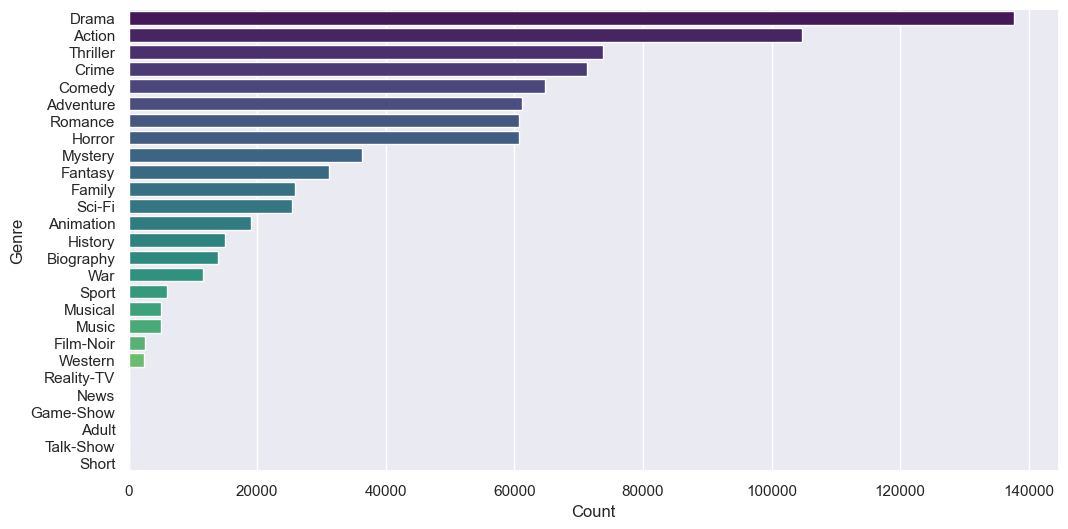

In [167]:
genre_counts = Counter(genre for sublist in df['genre_new'] for genre in sublist)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Genre', data=genre_df, palette='viridis')

In [168]:
zero_count_genres = all_genres - set(genre_counts.keys())

print("Genres with 0 count:", zero_count_genres)

Genres with 0 count: set()


In [169]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [170]:
df['cleaned_des'] = df['description'].apply(lambda x: clean_text(x))

In [171]:
print(df[['description', 'cleaned_des']].head(5))

                                         description  \
0  The people of Wakanda fight to protect their h...   
1  Jake Sully lives with his newfound family form...   
2  A pilot finds himself caught in a war zone aft...   
3  A middle-aged Chinese immigrant is swept up in...   
4  Dom Toretto and his family are targeted by the...   

                                         cleaned_des  
0  the people of wakanda fight to protect their h...  
1  jake sully lives with his newfound family form...  
2  a pilot finds himself caught in a war zone aft...  
3  a middle aged chinese immigrant is swept up in...  
4  dom toretto and his family are targeted by the...  


In [172]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [173]:
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['cleaned_des'] = df['cleaned_des'].apply(lambda x: remove_stopwords(x))

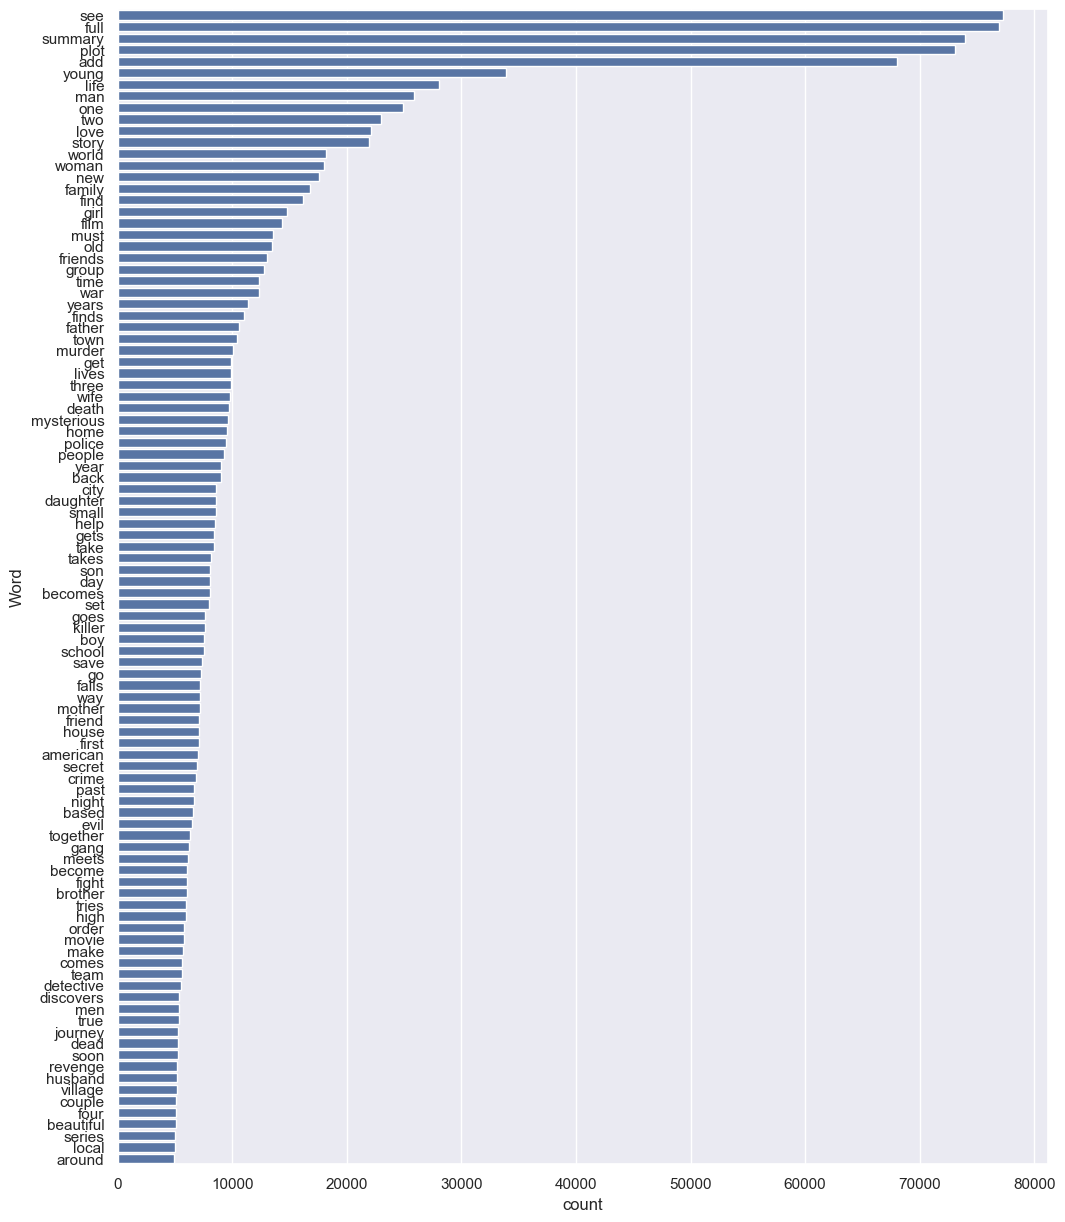

In [174]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(df['cleaned_des'], 100)

In [175]:
genre_dummies = df['genre_new'].explode().str.get_dummies()


In [176]:
new_df = df[['movie_id', 'cleaned_des']].join(genre_dummies).groupby('movie_id', as_index=False).max()

In [177]:
new_df.shape

(243197, 29)

In [178]:
print(df['movie_id'].nunique()) 

243197


In [179]:
display(new_df.head())


,movie_id,cleaned_des,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
0,tt0000009,adventures female reporter,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,tt0000574,story ned kelly infamous th century australian...,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000679,l frank baum would appear white suit present l...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0001049,add plot,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,tt0001115,consul bj rn urgently called company meeting c...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243197 entries, 0 to 243196
Data columns (total 29 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   movie_id     243197 non-null  object
 1   cleaned_des  243197 non-null  object
 2   Action       243197 non-null  int64 
 3   Adult        243197 non-null  int64 
 4   Adventure    243197 non-null  int64 
 5   Animation    243197 non-null  int64 
 6   Biography    243197 non-null  int64 
 7   Comedy       243197 non-null  int64 
 8   Crime        243197 non-null  int64 
 9   Drama        243197 non-null  int64 
 10  Family       243197 non-null  int64 
 11  Fantasy      243197 non-null  int64 
 12  Film-Noir    243197 non-null  int64 
 13  Game-Show    243197 non-null  int64 
 14  History      243197 non-null  int64 
 15  Horror       243197 non-null  int64 
 16  Music        243197 non-null  int64 
 17  Musical      243197 non-null  int64 
 18  Mystery      243197 non-null  int64 
 19  Ne

In [181]:
correlation_matrix = genre_dummies.corr()

<Axes: >

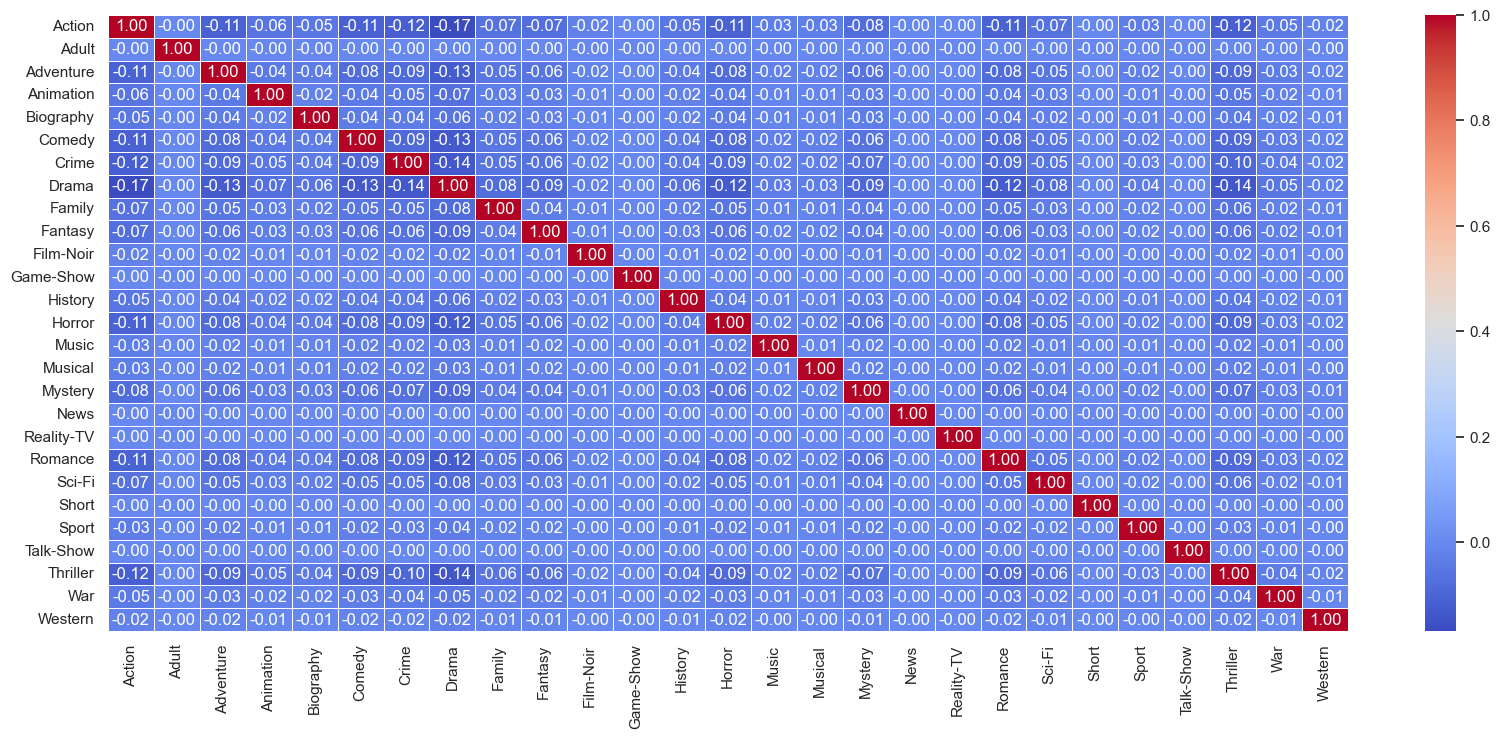

In [182]:
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
def multi_label_train_test_split(df, label_columns, min_test_size=0.2, random_state=42):
    np.random.seed(random_state)
    
    test_indices = set()
    
    # Ensure that each genre has at least some samples in the test set
    for genre in label_columns:
        genre_indices = df[df[genre] == 1].index
        test_size = max(1, int(len(genre_indices) * min_test_size))  
        test_indices.update(np.random.choice(genre_indices, size=test_size, replace=False))
    
    test_indices = list(test_indices)
    train_indices = df.index.difference(test_indices)

    train_df = df.loc[train_indices].reset_index(drop=True)
    test_df = df.loc[test_indices].reset_index(drop=True)

    return train_df, test_df

# Selecting label columns (excluding movie_id and cleaned_des)
label_columns = new_df.columns[2:]

# Perform train-test split
train_df, test_df = multi_label_train_test_split(new_df, label_columns, min_test_size=0.2)

# Extracting labels for training and testing
ytrain = train_df[label_columns].values  # One-hot encoded genres
ytest = test_df[label_columns].values

# Print dataset shapes
print("Train Set Shape:", train_df.shape)
print("Test Set Shape:", test_df.shape)

Train Set Shape: (159089, 29)
Test Set Shape: (84108, 29)


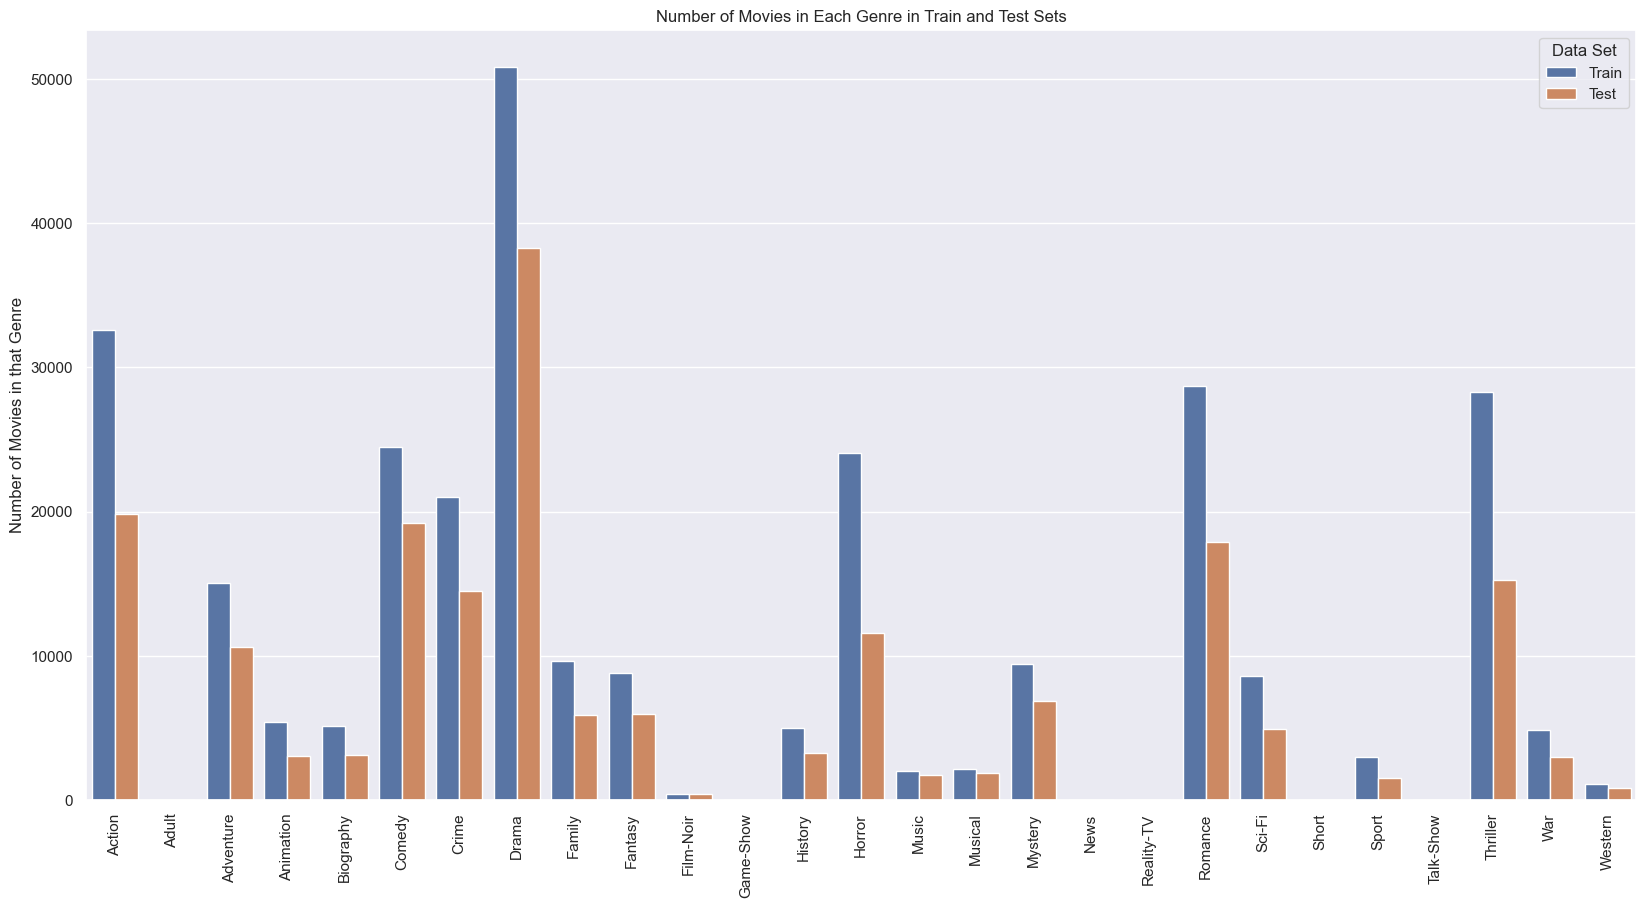

In [199]:
# Count number of movies per genre in train and test sets
train_counts = train_df.iloc[:, 2:].sum().reset_index()
test_counts = test_df.iloc[:, 2:].sum().reset_index()

# Rename columns
train_counts.columns = ['Genre', 'Train']
test_counts.columns = ['Genre', 'Test']

# Merge train and test counts
df_movies_per_genre = pd.merge(train_counts, test_counts, on='Genre', how='outer')

# Convert to long format for seaborn
df_movies_per_genre = df_movies_per_genre.melt(id_vars=['Genre'], var_name='Data Set', value_name='Total')

# Plot
f, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(data=df_movies_per_genre, x='Genre', y='Total', hue='Data Set', ax=ax)
ax.set(ylabel='Number of Movies in that Genre', xlabel='')
ax.set(title='Number of Movies in Each Genre in Train and Test Sets')
plt.xticks(rotation=90)
plt.show()

In [200]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=8000, stop_words='english')  # Adjust max_features as needed

# Fit and transform the training data
xtrain_tfidf = tfidf_vectorizer.fit_transform(train_df['cleaned_des'])

# Transform the test data using the same vectorizer
xtest_tfidf = tfidf_vectorizer.transform(test_df['cleaned_des'])

# Print shapes to confirm feature extraction
print("Train TF-IDF Shape:", xtrain_tfidf.shape)
print("Test TF-IDF Shape:", xtest_tfidf.shape)

Train TF-IDF Shape: (159089, 8000)
Test TF-IDF Shape: (84108, 8000)


In [ ]:
lr = LogisticRegression(max_iter=1000) 

clf = OneVsRestClassifier(lr)

clf.fit(xtrain_tfidf, ytrain)

y_pred = clf.predict(xtest_tfidf)

f1 = f1_score(ytest, y_pred, average='micro')  
print("F1 Score:", f1)

C:\Users\abhay\AppData\Roaming\Python\Python310\site-packages\sklearn\multiclass.py:90: UserWarning: Label not 21 is present in all training examples.
  warnings.warn(


F1 Score: 0.3223391793770841


In [ ]:
# Split test set into validation and test sets
test_df, val_df, ytest, yval = train_test_split(
    test_df, ytest, test_size=0.2, random_state=42  # Adjust split ratio as needed
)

# Transform validation data using the same TF-IDF vectorizer
xval_tfidf = tfidf_vectorizer.transform(val_df['cleaned_des'])

# Predict probabilities on validation set
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.2  
y_pred_new = (y_pred_prob >= t).astype(int)

f1_new = f1_score(yval, y_pred_new, average="micro")

print("New F1 Score with threshold", t, ":", f1_new)


New F1 Score with threshold 0.2 : 0.5150485894895744
